In [ ]:
# Using Machine Learning to predict sediment types in Cape York Peninsula

In this project, I use elemental concentrations to predict sediment types in Cape York Peninsula
Dataset available here: https://geoscience.data.qld.gov.au/report/cr099246

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Columns: 190 entries, UNIQUE_SAMPLEID to Zr.2
dtypes: float64(1), object(189)
memory usage: 1.9+ MB
TOS    637
BOS    633
Name: Horizon, dtype: int64
Lynd River          41
Einasleigh River    33
Mitchell River      32
Palmer River        28
Archer River        22
Burdekin River      20
Walsh River         20
Herbert River       17
Watson River        17
Staaten River       16
Name: Catchment, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,UNIQUE_SAMPLEID,SAMPLE_ID,FIELD_ID,Grainize,Horizon,Locality,Date_sampled,Latitude,Longitude,Duplicate,...,Y.1,Yb,Yb.1,Yb.2,Zn,Zn.1,Zn.2,Zr,Zr.1,Zr.2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GDA94,GDA94,NaN,...,MMI-ME,AR ICP-MS,HF-HNO3 ICP-MS,MMI-ME,AR ICP-MS,HF-HNO3 ICP-MS,MMI-ME,AR ICP-MS,HF-HNO3 ICP-MS,MMI-ME
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Degree decimal,Degree decimal,NaN,...,ppm,ppm,ppm,ppm,ppm,ppm,ppm,ppm,ppm,ppm
2,INTREF01_1TC,Batch_1,INTREF01,<2 mm,TOS,NaN,NaN,NaN,NaN,STD,...,1.43,0.8,2.23104267,0.119,39.5,42.7475904,1,1.9,141.7357825,0.052
3,INTREF01_1TF,Batch_1,INTREF01,<75 µm,TOS,NaN,NaN,NaN,NaN,STD,...,NaN,0.7,2.532306135,NaN,39.7,43.24957468,NaN,1.2,158.2187467,NaN
4,INTREF01_2TC,Batch_2,INTREF01,<2 mm,TOS,NaN,NaN,NaN,NaN,STD,...,0.987,NaN,2.63,0.096,NaN,57.2,0.77,NaN,168.52,0.032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


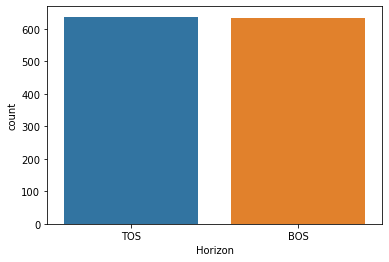

In [5]:
# import modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load data 
df = pd.read_csv('cape_york_horizons.csv', 
                 low_memory = False)

# Exploratory data analysis

df.info()
# Check balance of output variables

#df = df.loc[-(0:2),:]
print(df['Horizon'].value_counts()[:5])
print(df['Catchment'].value_counts()[:10])

sns.countplot(df['Horizon'])
df



In [6]:
# Some data cleaning is required

# Replace characters to allow string columns to be transformed to numerical

df = df.replace('<','', regex=True)
df = df.replace('>','', regex=True)
df = df.replace('<','', regex=True)
df = df.replace('DL','', regex=True)
df = df.replace('<','', regex=True)
df = df.replace(' ','', regex=True)

# Transform categorical output variables to numerical

dummies = pd.get_dummies(df['Horizon'])

# Join with original dataframe

df_ml = pd.concat([df, dummies], axis = 1)

# Select starting from second row

df_ml = df_ml.iloc[2:1278:,:]

# Select only relevant features

y = df_ml.loc[:,['BOS','TOS']]
X = df.iloc[2:1278:,12:190]

y = df_ml.loc[:,['BOS','TOS']]
y_2 = y.iloc[0:1270:,]


X = X.drop([col for col in X.columns if '.1' in col or '.2' in col or '.3' in col or '_Rpt' in col], 
            axis = 1)

# Convert columns to numerical variables

X = X.replace('#VALUE!','0', regex=True)
X = X.apply(pd.to_numeric, errors='coerce')

y.info()

# Check number of null variables

X.isnull().sum()

# Fill NA's with the mean

#plt.figure(figsize=(10,8))
#sns.heatmap(X.corr(), annot=True)
X = X.fillna(X.mean())

# Check number again

X.isnull().sum()

# Check for correlations

corr = print(X.corr())

#X[X['Horizon']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count']
#plt.figure(figsize=(10,8))
#sns.heatmap(X.corr(), annot=True)
corr



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 2 to 1277
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   BOS     1276 non-null   uint8
 1   TOS     1276 non-null   uint8
dtypes: uint8(2)
memory usage: 2.6 KB
          Al        As        Au         B        Ba        Be        Bi  \
Al  1.000000  0.030332  0.016542  0.048239  0.305461  0.471916  0.064218   
As  0.030332  1.000000  0.002436  0.062140  0.045794  0.264756  0.888673   
Au  0.016542  0.002436  1.000000  0.089321  0.005800  0.014064  0.002008   
B   0.048239  0.062140  0.089321  1.000000  0.235583  0.116558  0.001662   
Ba  0.305461  0.045794  0.005800  0.235583  1.000000  0.495714  0.008679   
..       ...       ...       ...       ...       ...       ...       ...   
Y   0.357098  0.272737  0.049453  0.156937  0.375212  0.751063  0.314563   
Y   0.289684  0.133715  0.053577  0.038554  0.076685  0.407345  0.166777   
Yb  0.345195  0.295183  0.038589

In [7]:
# Train models 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import sklearn
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y)


#decision tree
dt = DecisionTreeClassifier(max_depth = 10).fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print('Decision Tree: {:.3f}'.format(accuracy_score(y_test, y_pred_dt)))

#random forest
rf = RandomForestClassifier(max_depth = 10).fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print('Random Forest: {:.3f}'.format(accuracy_score(y_test, y_pred_rf)))

#extra trees 
ets = ExtraTreesClassifier(max_depth = 10).fit(X_train, y_train)
y_pred_ets = ets.predict(X_test)

print('Extra Trees: {:.3f}'.format(accuracy_score(y_test, y_pred_ets)))

#knn 
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print('K Neighbors: {:.3f}'.format(accuracy_score(y_test, y_pred_knn)))

#xg boost
xgb = XGBClassifier(use_label_encoder = False,
                    n_estimators = 300,
                    verbosity = 0, 
                    max_depth = 80,
                    learning_rate = 0.1,
                    colsample_bylevel = 0.7,
                    subsample = 0.9)

multilabel_xgb = MultiOutputClassifier(xgb)
multilabel_xgb.fit(X_train, y_train)

y_pred_xgb = multilabel_xgb.predict(X_test)

print('XG Boost: {:.3f}'.format(accuracy_score(y_test, y_pred_xgb)))
print('XG Boost: {:.3f}'.format(roc_auc_score(y_test, y_pred_xgb)))

Decision Tree: 0.690
Random Forest: 0.765
Extra Trees: 0.724
K Neighbors: 0.643


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


XG Boost: 0.790
XG Boost: 0.817


In [8]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
import pandas as pd

# Merge dataset

pred_df = pd.DataFrame(y_pred_xgb)
pred_df.index = y_test.index
pred_df.columns = dummies.columns

final = pd.DataFrame(X_test)
final['Actual_Strat'] = y_test.idxmax(axis = 1)
final['Pred_Strat'] = pred_df.idxmax(axis = 1)
final['Is_Equal'] = (final['Actual_Strat'] == final['Pred_Strat'])
#final = final.merge(df_ml[['LAT', 'LONG', 'rock_type']], left_index = True, right_index = True)
#final['rock_type'] = final['rock_type'].str.title() #capitalize rock types

final.info()
#preds=model.predict(X_test)
#print(confusion_matrix(y_test,preds))

#confusion_matrix(y_test, y_pred_knn, labels=[1,0])
#print('Decision Tree: {:.3f}'.format(accuracy_score(y_test, y_pred_dt)))
final.to_csv(r'my_data.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319 entries, 1153 to 881
Data columns (total 77 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Al            319 non-null    float64
 1   As            319 non-null    float64
 2   Au            319 non-null    float64
 3   B             319 non-null    float64
 4   Ba            319 non-null    float64
 5   Be            319 non-null    float64
 6   Bi            319 non-null    float64
 7   Ca            319 non-null    float64
 8   Cd            319 non-null    float64
 9   Ce            319 non-null    float64
 10  Cl            319 non-null    float64
 11  Co            319 non-null    float64
 12  Cr            319 non-null    float64
 13  Cs            319 non-null    float64
 14  Cu            319 non-null    float64
 15  Dy            319 non-null    float64
 16  Er            319 non-null    float64
 17  Eu            319 non-null    float64
 18  F             319 non-null 

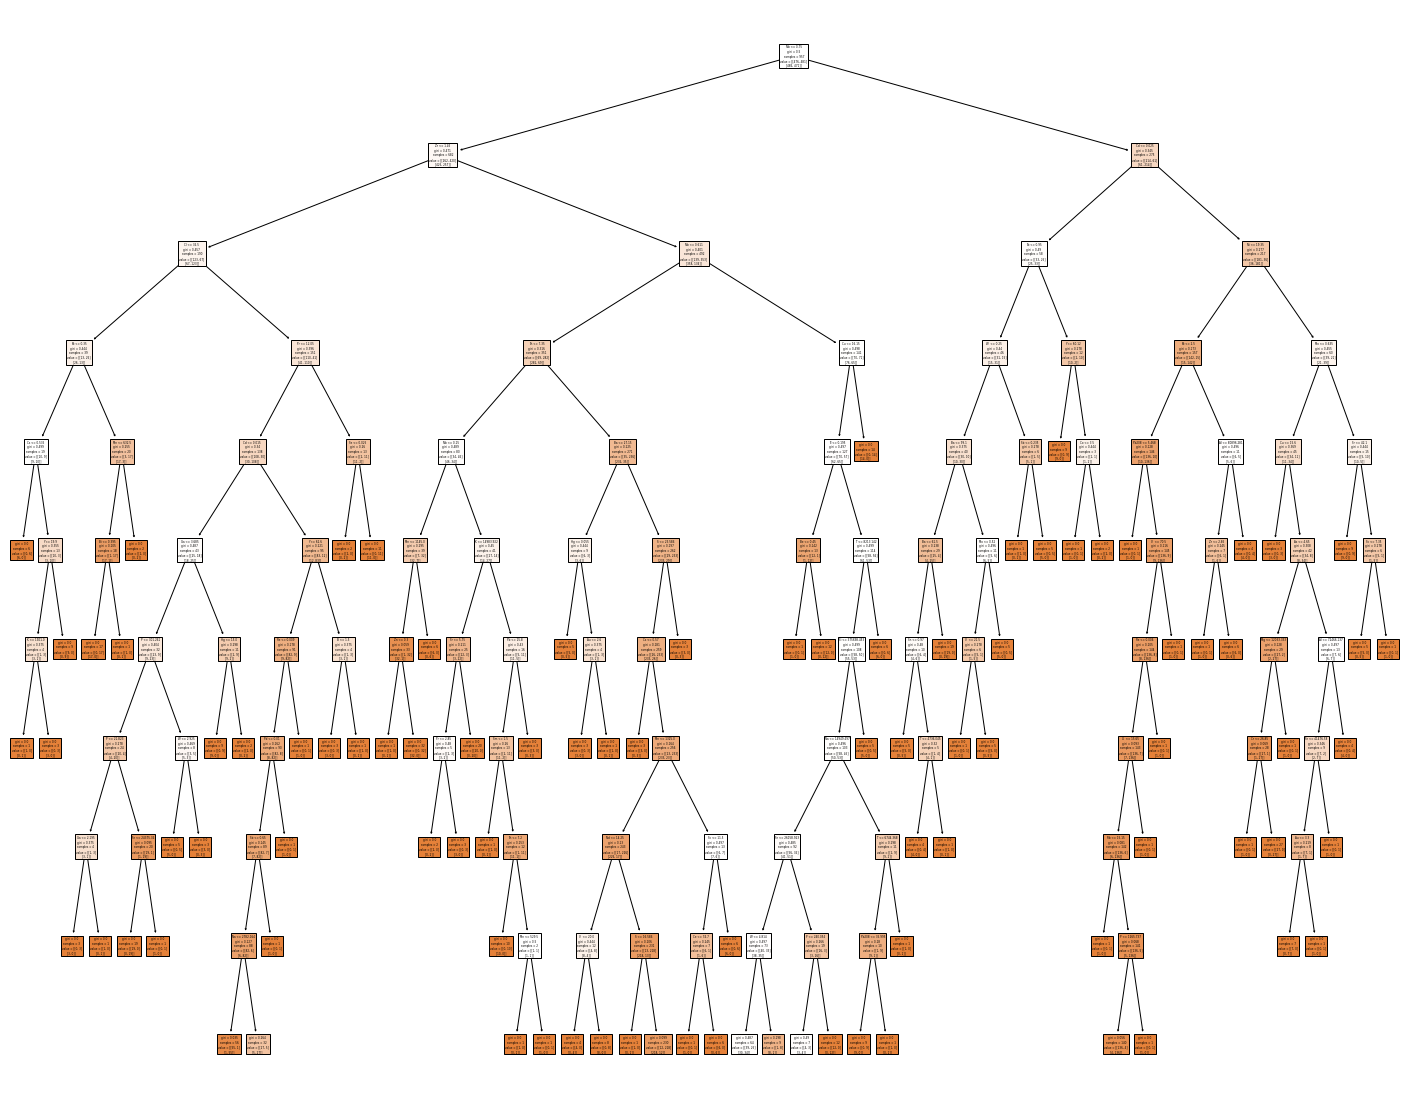

In [9]:
from sklearn import tree

# Graphical representation of decision tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=X.columns,  
                   class_names=y.columns,
                   filled=True)
